# **Context**

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Step 1 | Python Libraries**

**Step 1.1 | Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

**Step 1.2 | Library configurations**

In [3]:
pd.options.mode.copy_on_write = True
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# **Step2 | Data**


**Step 2.1 | Importing Data**

In [4]:
# import data with pandas
data = pd.read_csv('/content/drive/MyDrive/Dataset/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


**Step 2.2 | Data Informations**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
data.describe().loc[['min', '50%', 'mean', 'max', 'std']].T.style.background_gradient(axis=1)

,min,50%,mean,max,std
ph,0.000000,7.036752,7.080795,14.000000,1.594320
Hardness,47.432000,196.967627,196.369496,323.124000,32.879761
Solids,320.942611,20927.833607,22014.092526,61227.196008,8768.570828
Chloramines,0.352000,7.130299,7.122277,13.127000,1.583085
Sulfate,129.000000,333.073546,333.775777,481.030642,41.416840
Conductivity,181.483754,421.884968,426.205111,753.342620,80.824064
Organic_carbon,2.200000,14.218338,14.284970,28.300000,3.308162
Trihalomethanes,0.738000,66.622485,66.396293,124.000000,16.175008
Turbidity,1.450000,3.955028,3.966786,6.739000,0.780382
Potability,0.000000,0.000000,0.390110,1.000000,0.487849


In [7]:
columns_name = data.columns
for index, col_name in enumerate(columns_name):
    print(index, col_name)

0 ph
1 Hardness
2 Solids
3 Chloramines
4 Sulfate
5 Conductivity
6 Organic_carbon
7 Trihalomethanes
8 Turbidity
9 Potability


**Step 2.3 | Columns Explanation**

<div style="border:5px solid navy; border-radius:20px; padding: 15px; font-family:Arial">
<h3><b>1. pH value:</b></h3>
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

<h3><b>2. Hardness:</b></h3>
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

<h3><b>3. Solids (Total dissolved solids - TDS):</b></h3>
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

<h3><b>4. Chloramines:</b></h3>
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

<h3><b>5. Sulfate:</b></h3>
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

<h3><b>6. Conductivity:</b></h3>
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

<h3><b>7. Organic_carbon:</b></h3>
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

<h3><b>8. Trihalomethanes:</b></h3>
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

<h3><b>9. Turbidity:</b></h3>
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

<h3><b>10. Potability:</b></h3>
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.
</div>

# **Step3 | Visualizations**

**Step 3.1 | Plots**

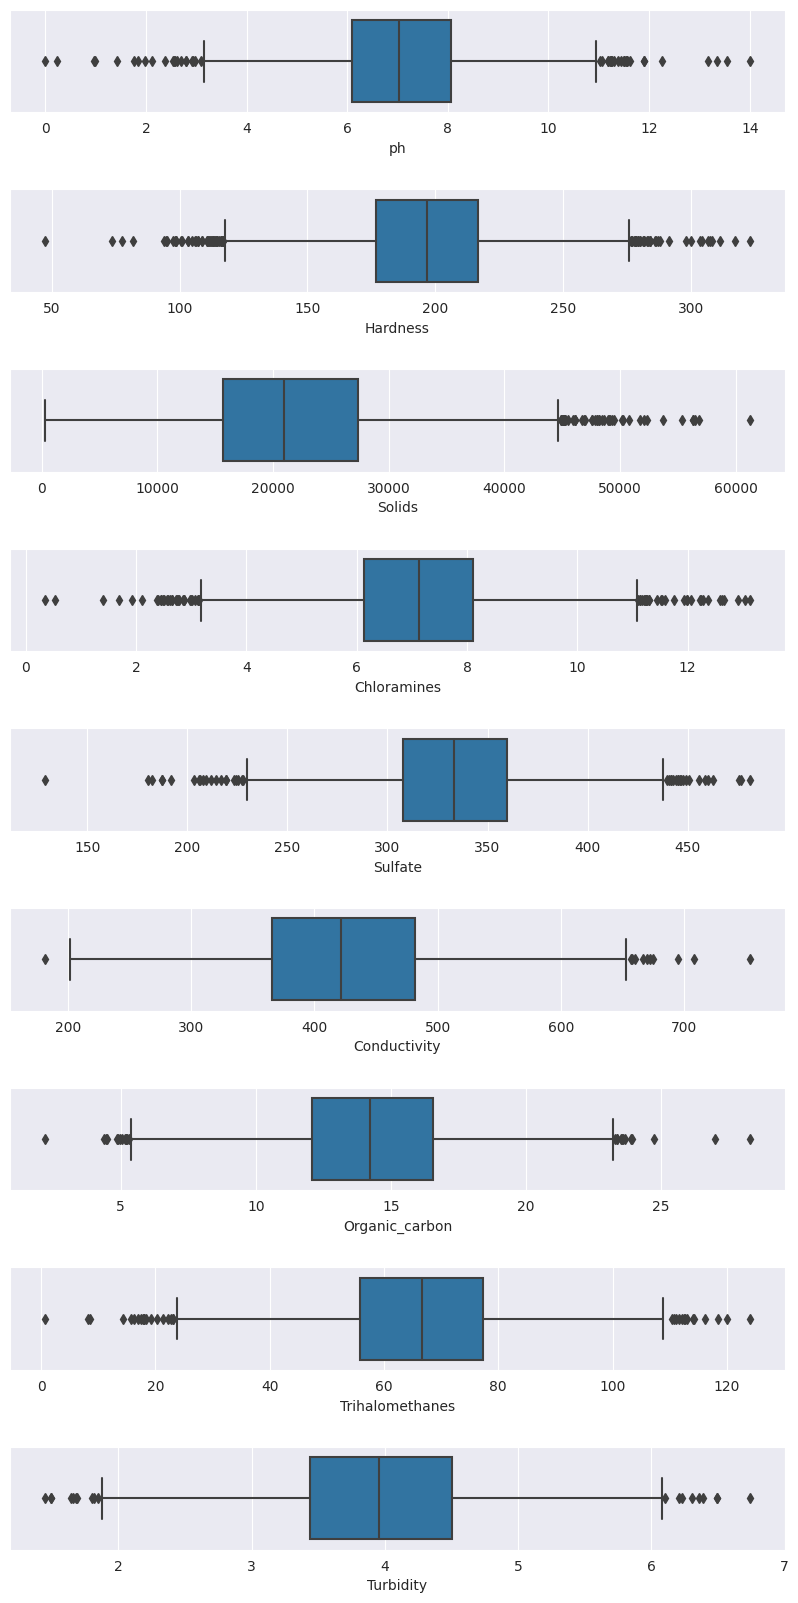

In [8]:
fig, ax = plt.subplots(9, 1, figsize=(10, 20))
fig.subplots_adjust(hspace=0.75)
for i in range(9) :
    sns.boxplot(x=columns_name[i], data=data, ax=ax[i])

0    1998
1    1278
Name: Potability, dtype: int64


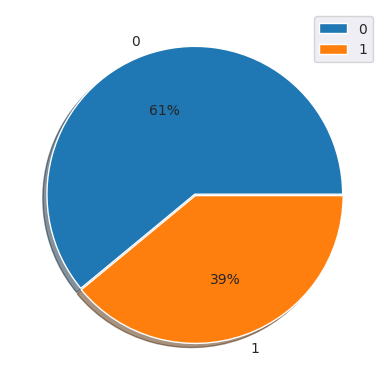

In [9]:
tar = data['Potability'].value_counts()
print(tar)

plt.pie(tar, labels=[0, 1], explode=[0, 0.01], autopct='%.f%%', shadow=True)
plt.legend()
plt.show()

It seeps there is no outlier and noise data in dataframe.

**Step 3.2 | Correlation**

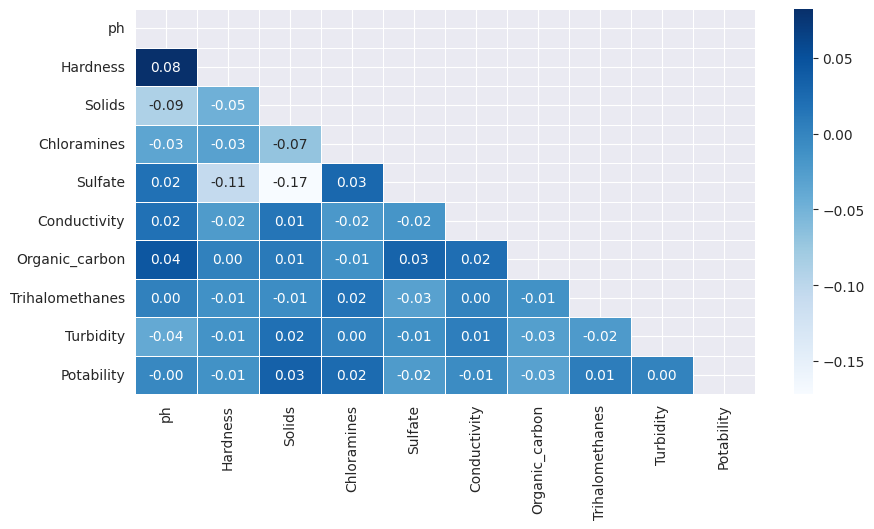

In [10]:
corr = data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

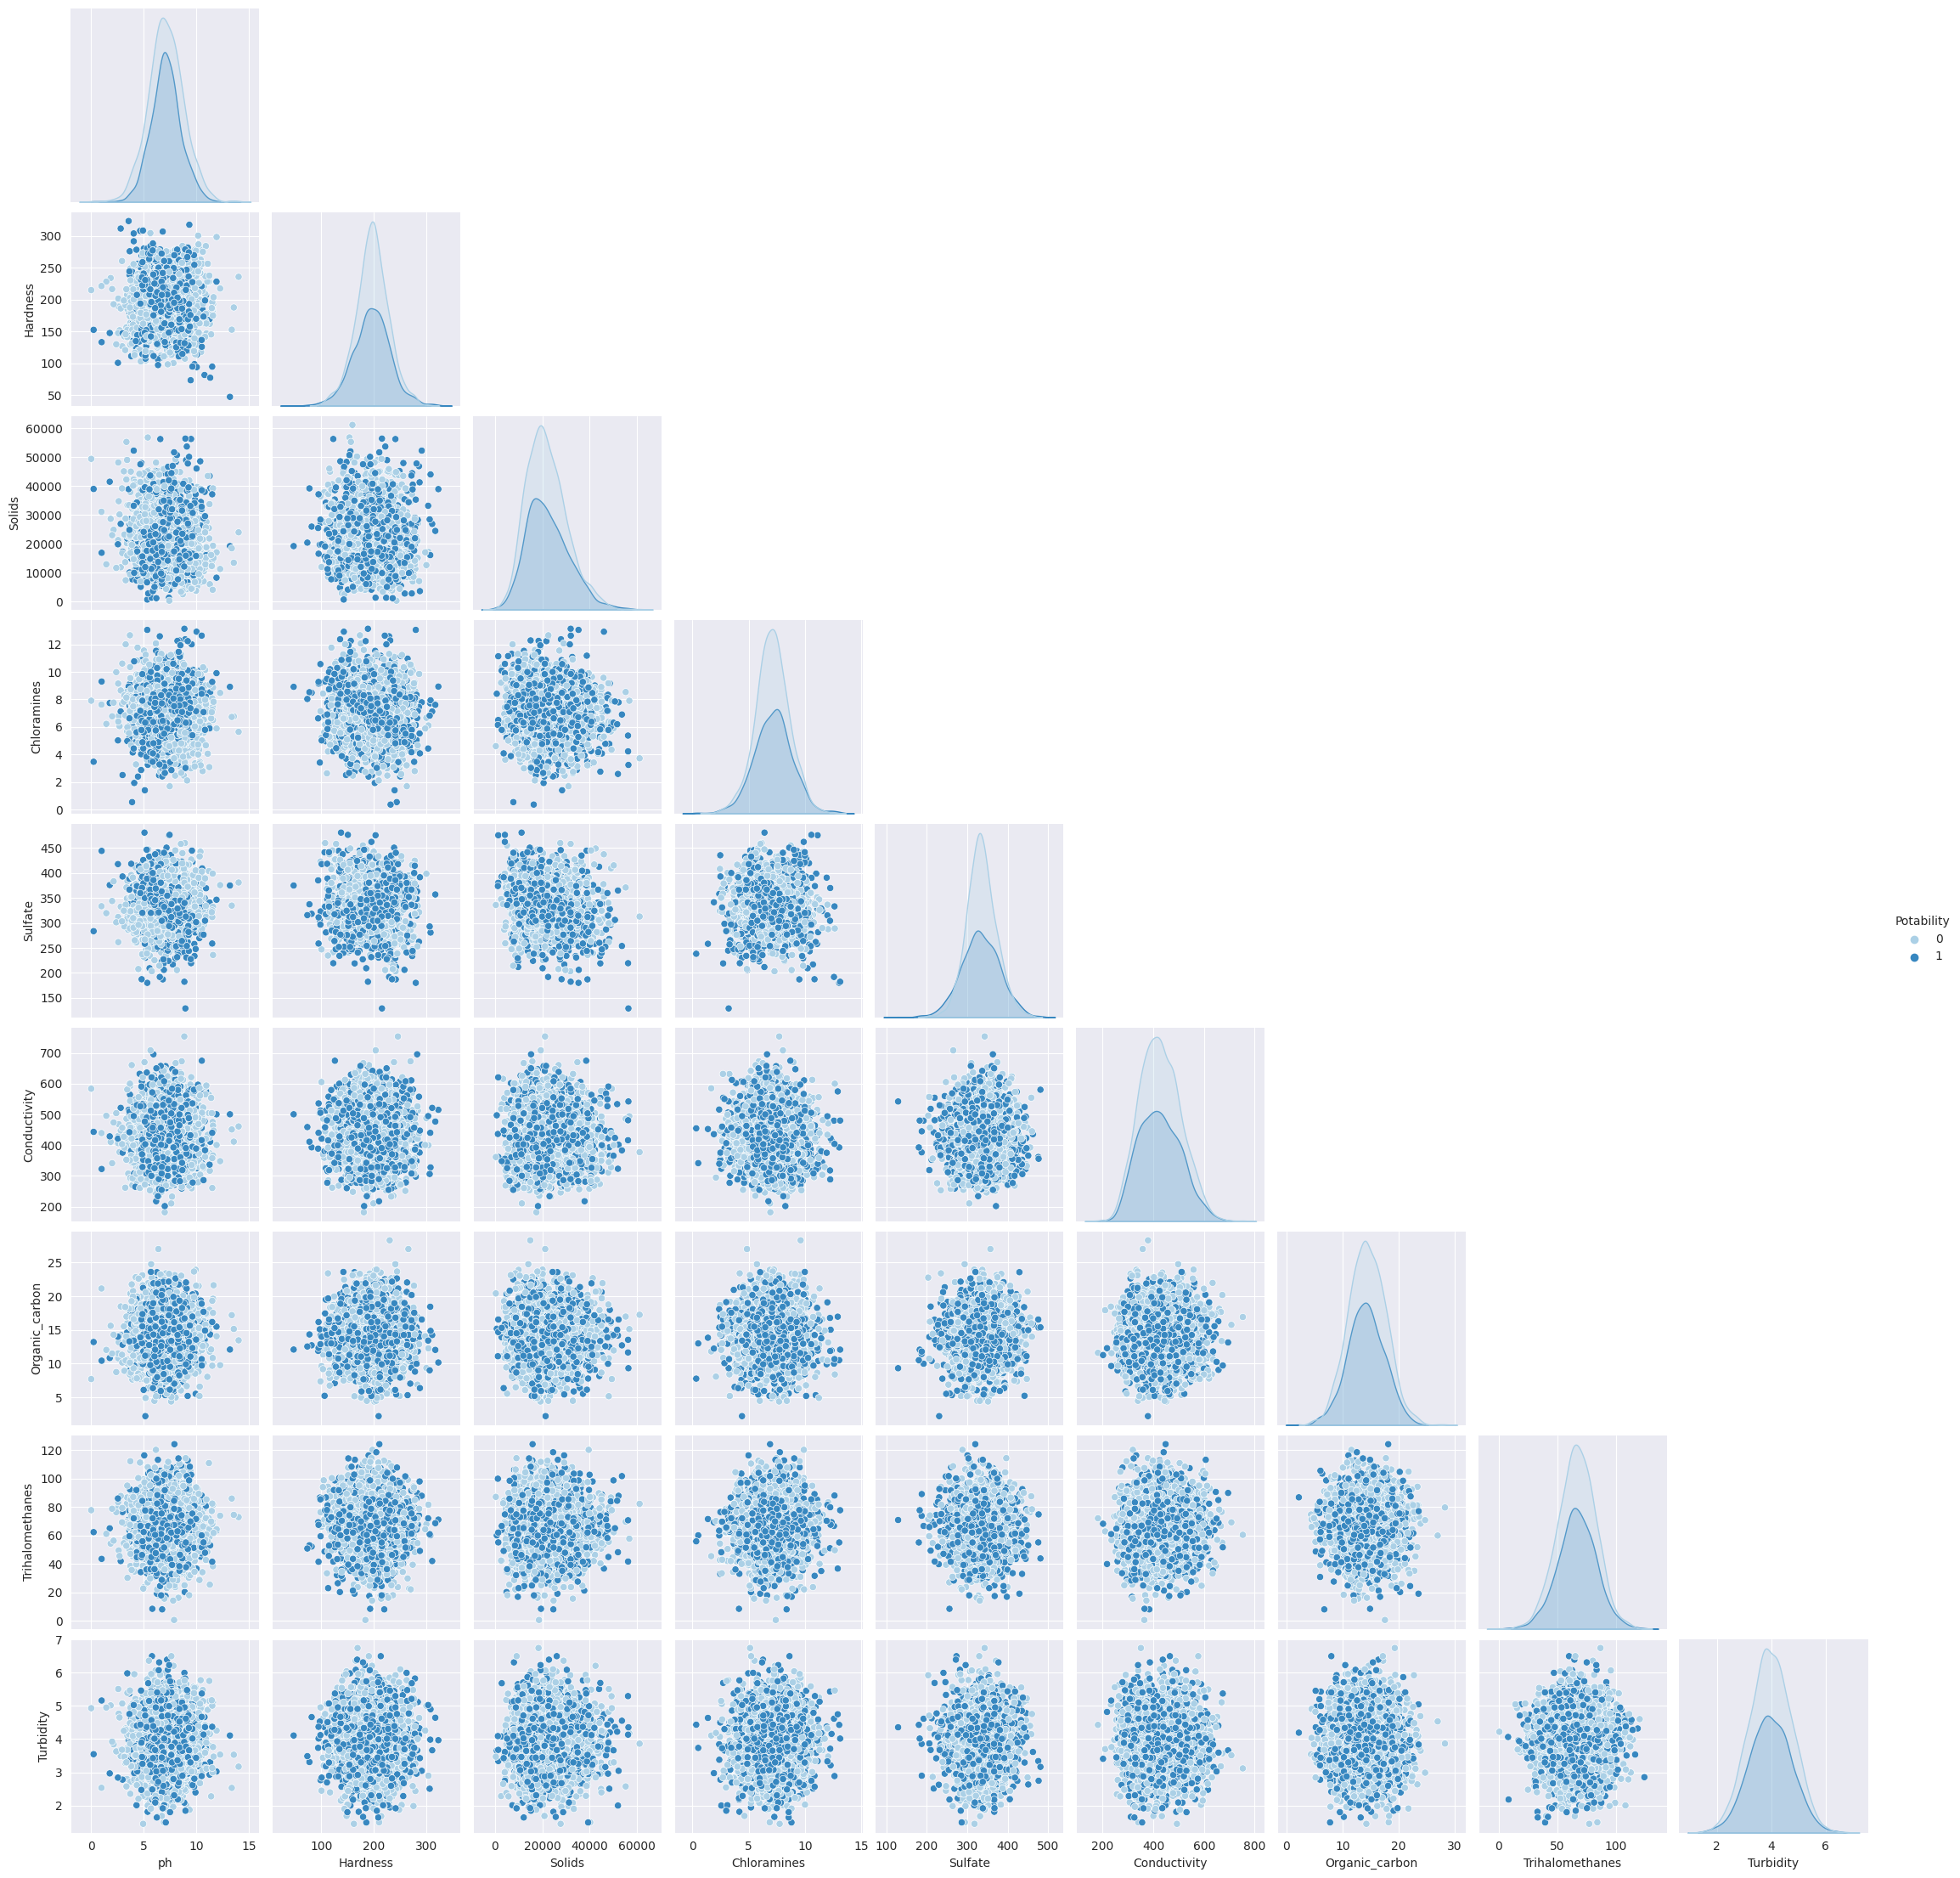

In [11]:
sns.pairplot(data, hue='Potability', corner=True, palette='Blues')
plt.show()

Seems there is no logical correlation in our data.

# **Step4 | Preprocessing**

**Step 4.1 | Missing Values Handling**

In [12]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [13]:
print("Number of all samples : ", len(data))

Number of all samples :  3276


In [14]:
print('Percentage(%) of nulls for each columns : \n')
print((data.isna().sum()/len(data))*100)

Percentage(%) of nulls for each columns : 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


Because of large number of missing values, we replace them with median for each column. columns with missing values :

*   ph
*   Sulfate
*   Trihalomethanes

In [17]:
print("For Potability = 1")
data[data.Potability==1][['ph', 'Sulfate', 'Trihalomethanes']].median()

For Potability = 1


ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

In [18]:
print("For Potability = 0")
data[data.Potability==0][['ph', 'Sulfate', 'Trihalomethanes']].median()

For Potability = 0


ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

- For both Potability=1 and Potability=0, medians are approximately equal.
- let's replace them all with their medians

In [19]:
data['ph'] = data['ph'].fillna(value=data['ph'].median())
data['Sulfate'] = data['Sulfate'].fillna(value=data['Sulfate'].median())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(value=data['Trihalomethanes'].median())

In [20]:
data.isna().sum().sum()

0

All missing valules handled...

**Step 4.1 | Normalization**

- Using Potability as target.
- Using MinMaxScaler() to map values in range [0, 1] (Normalization)

In [21]:
# Define X, y
X = data.drop(columns='Potability')
y = data.Potability

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df.describe().loc[['min', 'mean', 'std', 'max']].T.style.background_gradient(axis=1)

,min,mean,std,max
ph,0.000000,0.505300,0.105003,1.000000
Hardness,0.000000,0.540231,0.119263,1.000000
Solids,0.000000,0.356173,0.143968,1.000000
Chloramines,0.000000,0.529963,0.123921,1.000000
Sulfate,0.000000,0.581223,0.102672,1.000000
Conductivity,0.000000,0.427940,0.141336,1.000000
Organic_carbon,0.000000,0.463026,0.126750,1.000000
Trihalomethanes,0.000000,0.532763,0.127939,1.000000
Turbidity,0.000000,0.475853,0.147548,1.000000


# **Step5 | Modeling**

**Step 5.1 | Initialization**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
# A function to plot "Confusion Matrix" and "Classification Report"
def plot_result(y_pred) :
    '''
    1) plot Confusion Matrix
    2) plot Classification Report
    '''
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    fig.tight_layout()
    #AX left - Confusion Matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    ax[0]=sns.heatmap(cm, cmap='Blues', annot=True, fmt='', linewidths=0.5, ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['0', '1'])
    ax[0].yaxis.set_ticklabels(['0', '1'])
    #
    # AX Right - Classification Report
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    ax[1] = sns.heatmap(cr, cmap='Blues', annot=True, fmt='0.3f', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

**Step 5.2 | LogisticRegression**

In [27]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 1, 1000],
    'class_weight' : ['balanced', None],
    'solver' : ['liblinear', 'sag'],
    'penalty' : ['l2'],
    'n_jobs' : [-1],
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=20).fit(X_train, y_train)

print('Tuned hyper parameters :\n{}'.format(lr_cv.best_params_))

Tuned hyper parameters :
{'C': 0.001, 'class_weight': None, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'liblinear'}


In [28]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression Score : {}'.format(lr_score))

LogisticRegression Score : 0.627


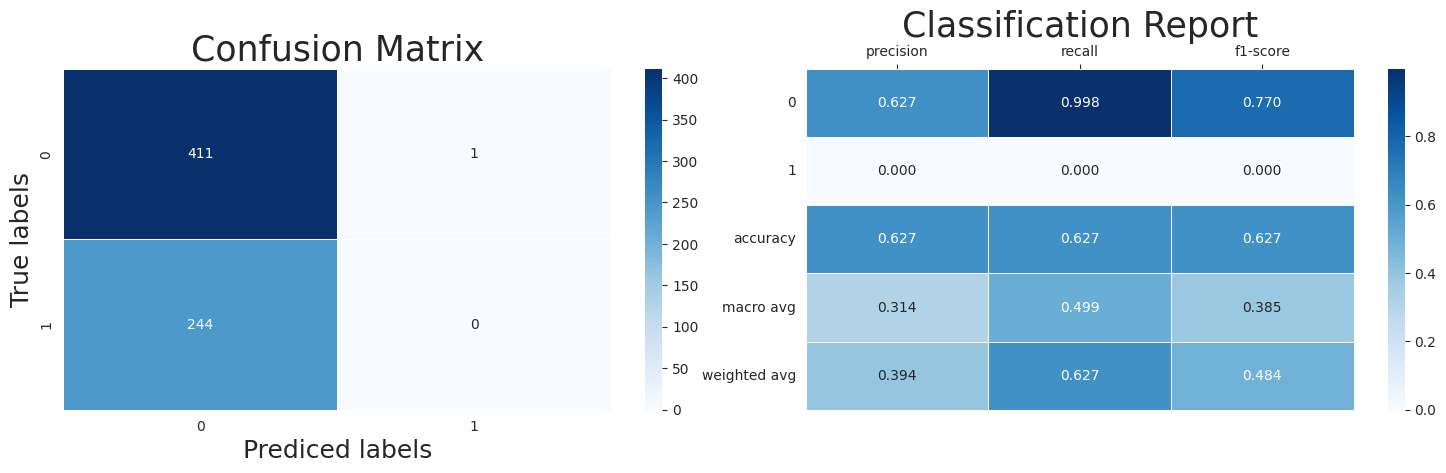

In [29]:
plot_result(y_pred_lr)

**Step 5.3 | RandomForestClassifier**

In [30]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [1000],
    'criterion' : ['log_loss'],
    'max_features' : ['sqrt'],
    'n_jobs' : [-1]
}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(estimator=rf, param_grid=parameters, cv=20).fit(X_train, y_train)
print('Tuned hyper parameters :\n{}'.format(rf_cv.best_params_))

Tuned hyper parameters :
{'criterion': 'log_loss', 'max_features': 'sqrt', 'n_estimators': 1000, 'n_jobs': -1}


In [31]:
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier Score : {}'.format(rf_score))

RandomForestClassifier Score : 0.688


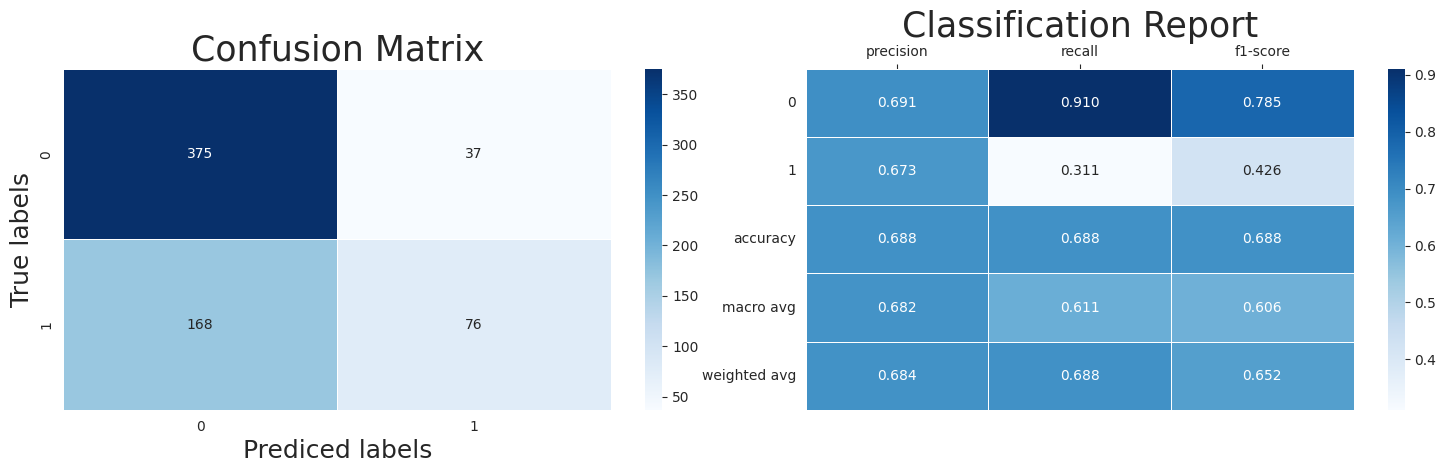

In [32]:
plot_result(y_pred_rf)

**Step 5.4 | MLPClassifier**

In [33]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'hidden_layer_sizes' : [500],
    'activation' : ['logistic'],
    'alpha' : [0.0001],
    'batch_size' : [200],

}

mlp = MLPClassifier()
mlp_cv = GridSearchCV(estimator=mlp, param_grid=parameters, cv=20).fit(X_train, y_train)

print('Tuned hyper parameters :\n{}'.format(mlp_cv.best_params_))

Tuned hyper parameters :
{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 200, 'hidden_layer_sizes': 500}


In [34]:
mlp = MLPClassifier(**mlp_cv.best_params_).fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

mlp_score = round(mlp.score(X_test, y_test), 3)
print('MLPClassifier Score : {}'.format(mlp_score))

MLPClassifier Score : 0.63


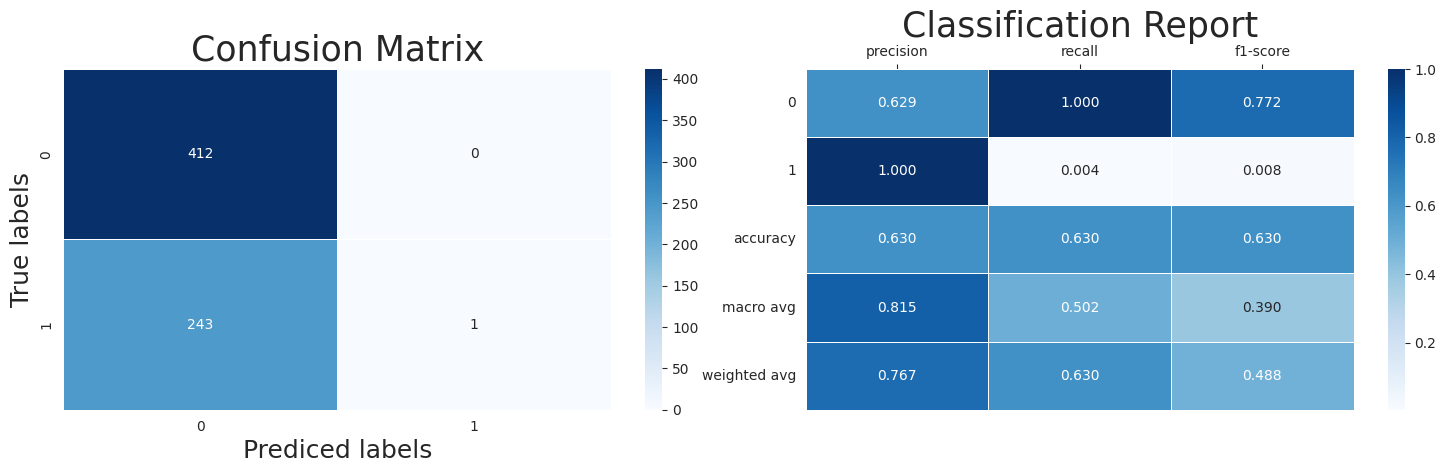

In [35]:
plot_result(y_pred_mlp)

**Step 5.5 | KNeighborsClassifier**

In [36]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters :\n{}'.format(knn_cv.best_params_))

Tuned hyper parameters :
{'n_neighbors': 35, 'p': 1, 'weights': 'distance'}


In [37]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score : {}'.format(knn_score))

KNeighborsClassifier Score : 0.616


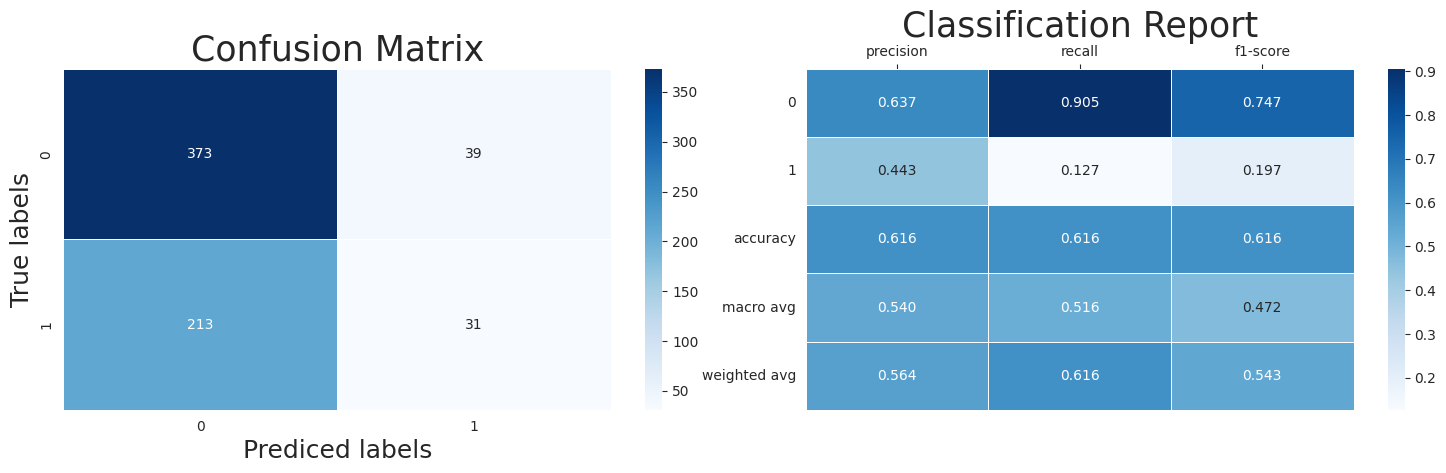

In [38]:
plot_result(y_pred_knn)

**Step 5.6 | Result**

In [70]:
result = pd.DataFrame({
    'Algorithm' : ['Random-Forest', 'Logistic-Regression', 'K-Nearest-Neighbors', 'MLP-Classifier'],
    'Accuracy' : [rf_score, lr_score,  knn_score, mlp_score]
})

result.style.background_gradient().format({'Accuracy': "{:.3f}"})

,Algorithm,Accuracy
0,Random-Forest,0.688
1,Logistic-Regression,0.627
2,K-Nearest-Neighbors,0.616
3,MLP-Classifier,0.630


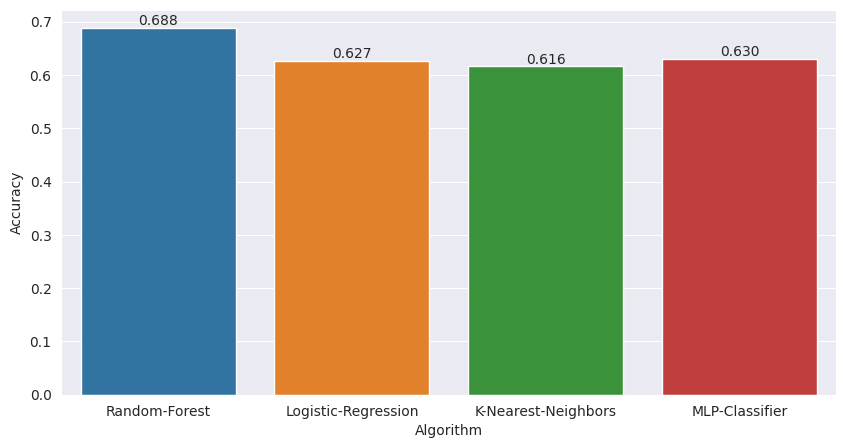

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.barplot(x='Algorithm', y='Accuracy', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm)
plt.show()

# **Best algorithm is Random Forest Classifier with score=0.688**

# **Parameter Tuning**

**Case 1**

In [77]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [100],
    'criterion' : ['gini'],
    'max_depth': [10],
    'max_features' : ['log2'],
    'n_jobs' : [-1]
}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(estimator=rf, param_grid=parameters, cv=20).fit(X_train, y_train)
print('Tuned hyper parameters :\n{}'.format(rf_cv.best_params_))

Tuned hyper parameters :
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100, 'n_jobs': -1}


In [78]:
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

y_pred_rf1 = rf.predict(X_test)

rf_score1 = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier Score : {}'.format(rf_score1))

RandomForestClassifier Score : 0.677


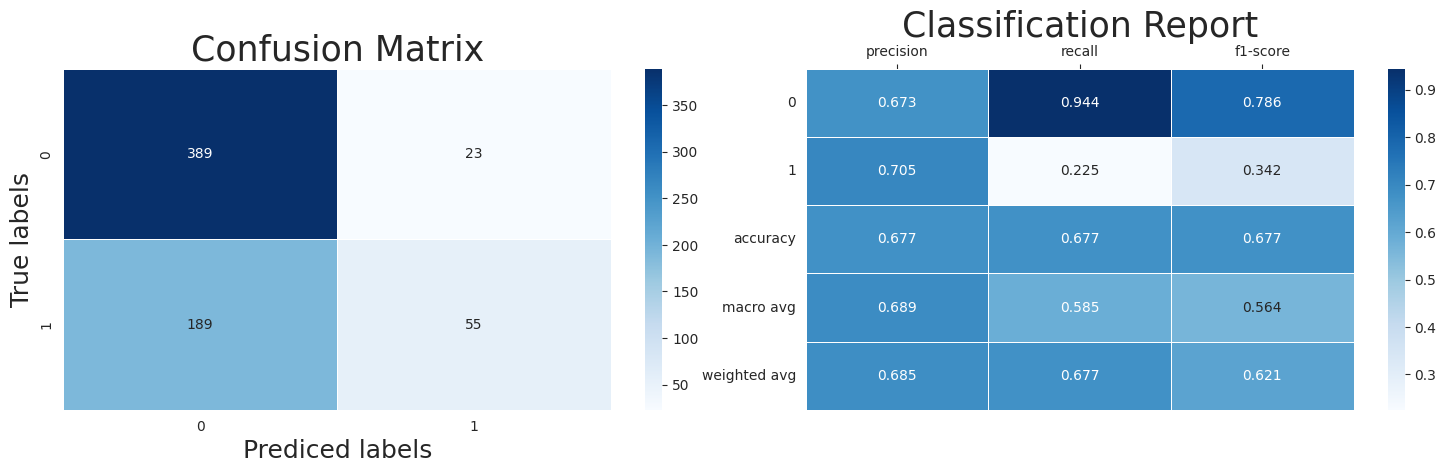

In [79]:
plot_result(y_pred_rf1)

**Case 2**

In [80]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [500],
    'criterion' : ['entropy'],
    'max_depth': [20],
    'max_features' : ['log2'],
    'n_jobs' : [-1]
}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(estimator=rf, param_grid=parameters, cv=20).fit(X_train, y_train)
print('Tuned hyper parameters :\n{}'.format(rf_cv.best_params_))

Tuned hyper parameters :
{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 500, 'n_jobs': -1}


In [81]:
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

y_pred_rf2 = rf.predict(X_test)

rf_score2 = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier Score : {}'.format(rf_score2))

RandomForestClassifier Score : 0.689


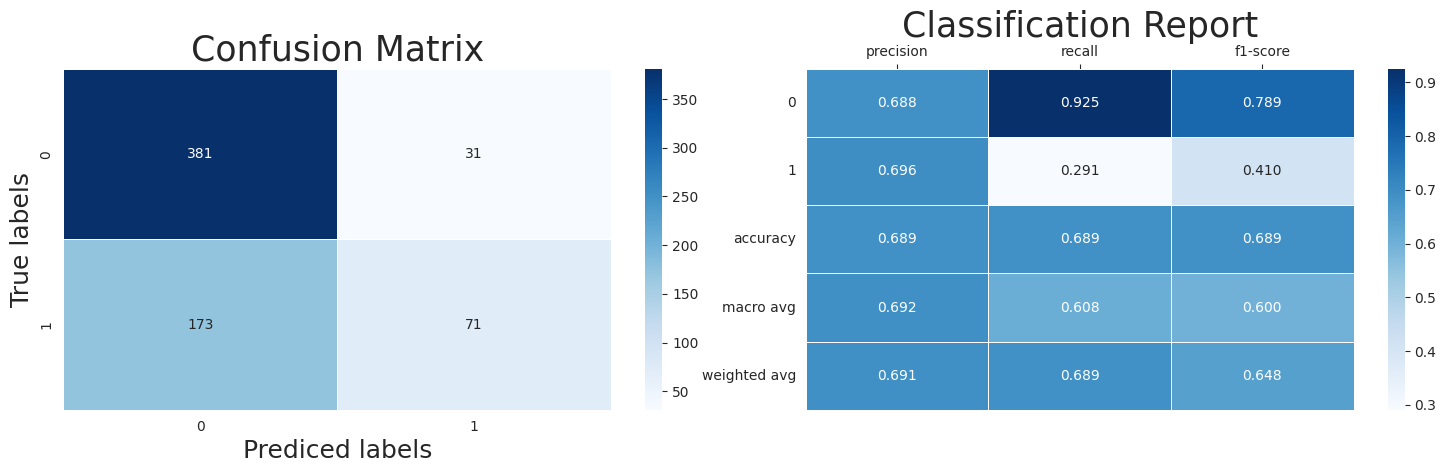

In [82]:
plot_result(y_pred_rf2)

**Comparative Result of Random Forest after Tuning**

In [83]:
result = pd.DataFrame({
    'Algorithm' : ['Random-Forest-1', 'Random-Forest-2', 'Random-Forest-3'],
    'Accuracy' : [rf_score, rf_score1,  rf_score2]
})

result.style.background_gradient().format({'Accuracy': "{:.3f}"})

,Algorithm,Accuracy
0,Random-Forest-1,0.688
1,Random-Forest-2,0.677
2,Random-Forest-3,0.689


**So, Random Forest 3 performed the best comparatively after tuning parameters.**

# **Test on new unseen data**

1 means Potable and 0 means Not potable.

**data record 1**

In [100]:
Data1 = np.array([7.034124, 224.2363, 20009.54, 10.275224, 350.1161, 20.86864, 16.28864, 66.12010, 3.099934]).reshape(1, -1)

Data1_scaled = scaler.transform(Data1)

class_mapping = {1: 'Potable', 0: 'Not Potable'}

y_pred_rf3 = rf.predict(Data1_scaled)

predicted_class = class_mapping.get(y_pred_rf3[0], 'Unknown')

print('Predicted Class for Data1:', predicted_class)


Predicted Class for Data1: Potable


**data record 2**

In [101]:
Data2 = np.array([6.3088, 180.944, 20965.31, 6.303354, 250.3453, 230.3502, 9.81294, 57.37136, 4.703021]).reshape(1, -1)

Data2_scaled = scaler.transform(Data2)

class_mapping = {1: 'Potable', 0: 'Not Potable'}

y_pred_rf4 = rf.predict(Data2_scaled)

predicted_class = class_mapping.get(y_pred_rf4[0], 'Unknown')

print('Predicted Class for Data2:', predicted_class)

Predicted Class for Data2: Potable


**data record 3**

In [112]:
Data3 = np.array([7.86465, 218.153, 23045.73, 7.432011, 341.0664, 414.3651, 14.78598, 72.60798, 3.585934]).reshape(1, -1)

Data3_scaled = scaler.transform(Data3)

class_mapping = {1: 'Potable', 0: 'Not Potable'}

y_pred_rf5 = rf.predict(Data3_scaled)

predicted_class = class_mapping.get(y_pred_rf5[0], 'Unknown')

print('Predicted Class for Data3:', predicted_class)

Predicted Class for Data3: Potable
